<a href="https://colab.research.google.com/github/Sriram-create/24BAD115-Machine-Learning-/blob/main/Exp_3_(Sen(1)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Roll No: 24BAD115
# EXPT NO: 3 – Multilinear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'students-performance-in-exams' dataset.
Path to dataset files: /kaggle/input/students-performance-in-exams


In [7]:
df = pd.read_csv("StudentsPerformance.csv")


In [8]:
le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])


In [9]:
df['final_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)


In [10]:
X = df[['parental level of education', 'test preparation course']]
y = df['final_score']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

MSE: 207.91715060774996
RMSE: 14.419332529897144
R2 Score: 0.030085923188504338


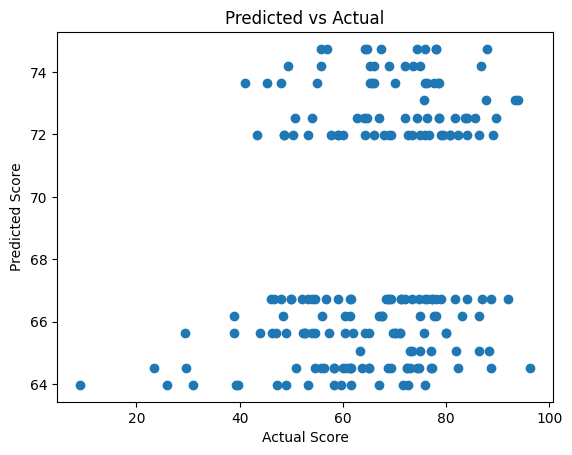

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Predicted vs Actual")
plt.show()
